In [10]:
import argparse
from pathlib import Path
from matplotlib import pyplot as plt
from PIL import Image, ImageOps
import os
import glob
import cv2
import numpy as np
from tqdm import tqdm
import fnmatch
from face_detection import FaceDetection
from params import RANDOM_SEED, LocationConfig, CreateDataConfig

In [3]:
def load_img(path: Path) -> np.ndarray:
    if not path.exists():
        raise Exception(f"Given file: '{path}' - does not exists!")
    return cv2.imread(str(path))

In [4]:
list_of_face_shapes = [[],[],[]]

In [5]:
def resize(image: np.ndarray) -> np.ndarray:
    img = Image.fromarray(np.array(image).astype(np.uint8))
    img = img.resize((128, 128), Image.ANTIALIAS)
    img = np.array(ImageOps.grayscale(img))
    img = np.expand_dims(img, axis=2)
    return img.astype(np.float32)

In [13]:
def detect_and_crop(face_detect_app: FaceDetection, input_path: Path, output_path: str, img_num: int):
    img = load_img(input_path)
    faces = face_detect_app.detect_face(img)
    if len(faces) == 0 or len(faces) > 1:
        return

    face_box = faces[0].astype(np.int32)
    try:
        new_img = img[face_box[1] : face_box[3], face_box[0] : face_box[2]]
    except IndexError:
        return
    
    if new_img.shape[0]<67 or new_img.shape[1]<49:
        return
    
    list_of_face_shapes[0].append(img_num)
    list_of_face_shapes[1].append(new_img.shape[0])
    list_of_face_shapes[2].append(new_img.shape[1])
    new_img = resize(new_img)
    if new_img is None:
        return
    
    filename = str(input_path).split('/')[-1]
    cv2.imwrite(os.path.join(output_path,filename), new_img)

In [7]:
face_detector = FaceDetection()

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}


In [8]:
total_f=0
for image_path in tqdm(Path(LocationConfig.raw_data).glob('*/*.jpg')):
    total_f += 1

30935it [00:00, 555846.94it/s]


  0%|          | 1/30935 [00:00<1:09:54,  7.37it/s]

(110, 82, 3)
(128, 128, 1)
(90, 64, 3)
(128, 128, 1)


  0%|          | 2/30935 [00:00<1:20:37,  6.40it/s]


(133, 84, 3)
(128, 128, 1)


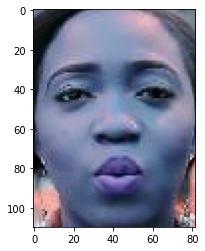

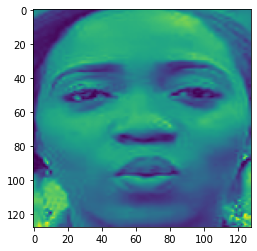

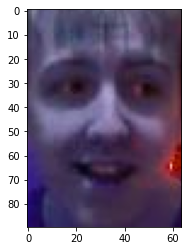

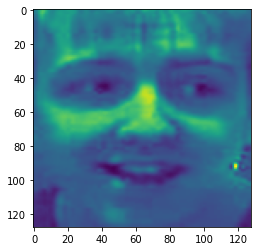

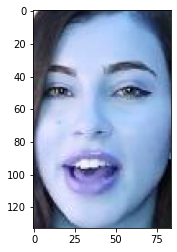

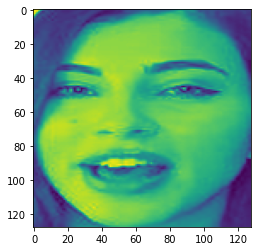

In [14]:
i=0
for image_path in tqdm(Path(LocationConfig.raw_data).glob('*/*.jpg'), total=total_f):
    detect_and_crop(face_detector, image_path, LocationConfig.crop_data, i)
    i+=1